# курсовая работа

Зарплаты в San Francisco
https://www.kaggle.com/kaggle/sf-salaries?select=Salaries.csv 

задача:
Как со временем менялись зарплаты между разными группами (группировка по Department - fire, medicine, police)? 
(максимальная, медианная, средняя)
Как распределяются базовая оплата, сверхурочная работа и льготы между разными группами? Нужно построить диаграммы по распределению со временем для каждого департамента по базовым, сверхурочным и льготам
Как распределяется бюджет на разные группы (department) с течением времени?
Какое количество людей в каждом департаменте? 
Какое количество с разным уровнем дохода? (гистограмма с шагом в 5к) 
На базе линейной регрессии постройте прогноз по тому, какие будут закупки на следующий год по каждому департаменту


Цель моей работы провести анализ путем выбора инструмента зарплат сотрудников различных департаметов. 
Наглядно продемонстрировать и показать на графиках, в таблицах в коэффициэнтах.
-Рассмотерть базовую сумму- - оклад, по ряду позиций.
-Динамику изменения зарплаты по разным категориям в сравнении с предыдущими периодами
-политику организаций в области льгот
-провести анализ по должности за разные периоды

Для анализа используются величины:
- медиана - значение зп, расположенное в середине изучаемого массива, упорядоченное по возрастанию
(актуально использовать т.к не чувствительна к влиянию экстремальных значений)
- ниже рынка- значение, ниже которого в упорядоченном по возрастанию массиве находится четверть (25%) данных по зарплатам.
- выше рынка -  значение, выше которого в упорядоченном по возрастанию массиве находится четверть (25%) данных о зп.
- Среднее арифметическое -  сумма всех значений, деленная на количество заработных плат (при использовании стоит учитывать, 
что данная величина довольно чувствительна к влиянию экстремальных значений (слишком малые и слишком большие зарплаты), 
поэтому ориентироваться на данный показатель в случае большого разброса данных не стоит.



In [737]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

from scipy.stats import cosine
#import csv
#import sys

import requests

import seaborn as sns
from scipy import stats

In [738]:
#df = list(csv.DictReader(open('Salaries.csv', encoding='utf-8', newline='')))  #telecom_churn.csv
#url = f'https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing/telecom_churn.csv'
#url=f'https://www.kaggle.com/kaggle/sf-salaries?select=Salaries.csv'
df = pd.read_csv('Salaries.csv')
df.head(15)


C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning:

Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.



,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,"167,411.2",0.0,"400,184.2",NaN,"567,595.4","567,595.4",2011,nan,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),"155,966.0","245,131.9","137,811.4",NaN,"538,909.3","538,909.3",2011,nan,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),"212,739.1","106,088.2","16,452.6",NaN,"335,279.9","335,279.9",2011,nan,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,"77,916.0","56,120.7","198,306.9",NaN,"332,343.6","332,343.6",2011,nan,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)","134,401.6","9,737.0","182,234.6",NaN,"326,373.2","326,373.2",2011,nan,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,"118,602.0","8,601.0","189,082.7",NaN,"316,285.7","316,285.7",2011,nan,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)","92,492.0","89,062.9","134,426.1",NaN,"315,981.0","315,981.0",2011,nan,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,"256,577.0",0.0,"51,322.5",NaN,"307,899.5","307,899.5",2011,nan,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)","176,932.6","86,362.7","40,132.2",NaN,"303,427.5","303,427.5",2011,nan,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)","285,262.0",0.0,"17,115.7",NaN,"302,377.7","302,377.7",2011,nan,San Francisco,NaN


In [596]:
df.shape  # количество элементов (строк, столбцов)

(148654, 13)

# проведем анализ нужных нам параметров находящихся в файле

In [739]:
#сделаем корректировку поля Status и переведем в 1 и 0
def check_Status(df):
    if df.Status=='FT':  #part time  частичный рабочий день
        return 1
    if df.Status=='PT':  #full time полный рабочий день
        return 0

In [740]:
df['Status'] = df.apply(check_Status,axis=1) # заменила на 0 или 1 и внесла в основной файл

In [489]:
df.isna().sum()  # проверяем на наличие NaN в общей базе

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [314]:
df[df.BasePay.isna()] #выводим данные с NaN по полю BasePay  


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
81391,81392,Kevin P Cashman,Deputy Chief 3,NaN,0.0,"149,934.1",0.0,"149,934.1","149,934.1",2013,nan,San Francisco,nan
84506,84507,Demetrya Mullens,Licensed Vocational Nurse,NaN,0.0,"110,485.4","20,779.0","110,485.4","131,264.4",2013,nan,San Francisco,nan
84960,84961,Michael M Horan,Park Patrol Officer,NaN,0.0,"120,000.0","8,841.5","120,000.0","128,841.5",2013,nan,San Francisco,nan
90525,90526,Thomas Tang,Police Officer 3,NaN,0.0,"106,079.3",0.0,"106,079.3","106,079.3",2013,nan,San Francisco,nan
90786,90787,Michael C Hill,Deputy Sheriff,NaN,0.0,"81,299.0","23,877.5","81,299.0","105,176.6",2013,nan,San Francisco,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110526,110527,Arthur L Curry,PS Aide Health Services,NaN,0.0,10.7,0.0,10.7,10.7,2013,nan,San Francisco,nan
110527,110528,Nereida Vega,Senior Clerk,NaN,0.0,5.6,0.0,5.6,5.6,2013,nan,San Francisco,nan
110528,110529,Timothy E Gibson,Police Officer 3,NaN,0.0,0.0,-2.7,0.0,-2.7,2013,nan,San Francisco,nan
110529,110530,Mark E Laherty,Police Officer 3,NaN,0.0,0.0,-8.2,0.0,-8.2,2013,nan,San Francisco,nan


In [393]:
df.Status.value_counts(normalize=True) #  проверяю состояние поля, из каких значений он состоит

1.0   0.6
0.0   0.4
Name: Status, dtype: float64

In [316]:
df.groupby(['BasePay'])['BasePay'].count() #проверяю количество нулей, отрицательных значений, и др зачения BasePay.


BasePay
-166.01         1
-121.63         1
-109.22         1
-106.6          1
-101.88         1
               ..
9991.53         1
9997.15         1
9998.60         1
9999.59         1
Not Provided    4
Name: BasePay, Length: 109900, dtype: int64

In [741]:
# удаляем Not Provided - не предоставлено 
df = df.drop(df[df.BasePay =='Not Provided'].index)


In [742]:
# переводим сумму float и удаляем все отрицательные и нулевые суммы
df = df.drop(df[df.BasePay.astype(float) <=0.0].index)


In [743]:
df.info() #необходимые мне значения имеют тип object 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147341 entries, 0 to 148620
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                147341 non-null  int64  
 1   EmployeeName      147341 non-null  object 
 2   JobTitle          147341 non-null  object 
 3   BasePay           146736 non-null  object 
 4   OvertimePay       147341 non-null  object 
 5   OtherPay          147341 non-null  object 
 6   Benefits          111634 non-null  object 
 7   TotalPay          147341 non-null  float64
 8   TotalPayBenefits  147341 non-null  float64
 9   Year              147341 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            147341 non-null  object 
 12  Status            37693 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 15.7+ MB


In [744]:
#переведу тип переменных object  в float64
df['BasePay']=df.BasePay.astype(float)
df['OvertimePay']=df.OvertimePay.astype(float)
df['OtherPay']=df.OtherPay.astype(float)

In [745]:
# меняем все пустоты NaN на значение медианы 
df.fillna(df.BasePay.median(),inplace = True) 
#df['BasePay']=df['BasePay'].fillna(df.BasePay.median(),inplace=True)

df['BasePay'] = df['BasePay'].str.replace('%','').astype(np.float64)
df['OvertimePay'] = df['OvertimePay'].str.replace('%','').astype(np.float64)
df['OtherPay'] = df['OtherPay'].str.replace('%','').astype(np.float64)


In [496]:
#проверить на корретность полей, базовая оплата нулевые знечения - очень маленький %, можно удалить
df.BasePay.value_counts(normalize=True) 

65,258.0   0.0
54,703.0   0.0
55,026.0   0.0
48,472.4   0.0
65,448.0   0.0
            ..
48,249.9   0.0
20,487.1   0.0
53,546.0   0.0
1,607.0    0.0
7,611.7    0.0
Name: BasePay, Length: 109477, dtype: float64

In [323]:
#проверить на корретность полей, другие значения - Оплата сверхурочной работы -- очень маленький %, можно удалить
df.OvertimePay.value_counts(normalize=True) 

0.0        0.5
10.7       0.0
681.2      0.0
152.1      0.0
1,314.8    0.0
            ..
1,629.8    0.0
22,136.4   0.0
19,597.1   0.0
2,924.2    0.0
4,195.4    0.0
Name: OvertimePay, Length: 65930, dtype: float64

In [117]:
df.groupby(['OvertimePay'])['OvertimePay'].count() #проверяю количество нулей, отрицательных значений, и др.

OvertimePay
-0.0             1
0.0          76096
0.0              1
0.5              1
0.8              1
             ...  
173,547.7        1
192,424.5        1
196,689.2        1
220,909.5        1
245,131.9        1
Name: OvertimePay, Length: 65930, dtype: int64

In [746]:
# переводим сумму float и удаляем все отрицательные и нулевые суммы
df = df.drop(df[df.OvertimePay.astype(float) <=0.0].index)

In [498]:
#проверить на корретность полей, другие значения - другое - льготы-- очень маленький %, можно удалить
df.OtherPay.value_counts(normalize=True) 

0.0        0.1
624.0      0.0
250.0      0.0
648.0      0.0
874.0      0.0
            ..
8,572.5    0.0
19,581.5   0.0
557.5      0.0
242.1      0.0
3,769.8    0.0
Name: OtherPay, Length: 57401, dtype: float64

In [747]:
# переводим сумму float и удаляем все отрицательные и нулевые суммы
df = df.drop(df[df.OtherPay.astype(float) <=0.0].index)

#база подготогвлена для работы, 
проведу группировку по Department - fire, medicine, police

# МЕДИЦИНА

In [748]:
# группирую по ключевым словам относяшимся к департаменту - медицина
MEDICAL=['PATIENT','PARAMEDIC','MEDICAL','NURSE','MENTAL','HEALTH','PHYSICIAN','PSYCHIATRIC','NURSING','HOSPITAL','PHYSICAL','THERAP','PHARMAC','PSYCHOLOGIST','X-RAY','NUTRITIONIST','DIETITIAN','ANESTHETIST','EPIDEMIOLOGIST','DENTAL','CLINICAL','REHABILITATION','HLTH','PATHOLOGIST','DISEASE','CARE','SURGICAL','DENTIST','MORGUE','REHABILITATION','PATIENT','MED STAFF','EPIDEMIOLOGIST']
df_MEDICAL = pd.DataFrame()
for i in MEDICAL:
    df_MEDICAL = df_MEDICAL.append(df[df['JobTitle'].str.upper().str.contains(i)])


In [712]:
df_MEDICAL.shape

(16586, 13)

In [749]:
# TotalPay=BasePay+OvertimePay+OtherPay  общая сумма =основная+сверхурочная+льготы
# находим параметры по TotalPay 
df_MEDICAL.TotalPay.describe() 

count    16,586.0
mean     84,222.0
std      43,060.0
min         312.2
25%      55,250.7
50%      74,430.1
75%     115,120.4
max     337,204.9
Name: TotalPay, dtype: float64

In [750]:
df_MEDICAL.sort_values("TotalPay") #сортирвка в порядке возрастания
df_MEDICAL.TotalPay.median()  # находим медиану 


74430.11

In [751]:
pd.options.display.float_format = '{:,.1f}'.format #чтобы округлял значения до сотых:

In [752]:
# группируем TotalPay с разбивкой по годам
dr3=df_MEDICAL.groupby(['Year'])['TotalPay'].agg(['median','max','mean','count']) 
dr3

,median,max,mean,count
Year,,,,
2011,"69,178.2","278,569.2","78,508.0",4327
2012,"73,693.9","337,204.9","82,982.7",4042
2013,"80,213.1","286,416.2","90,043.7",4000
2014,"75,018.7","258,571.0","85,750.7",4217


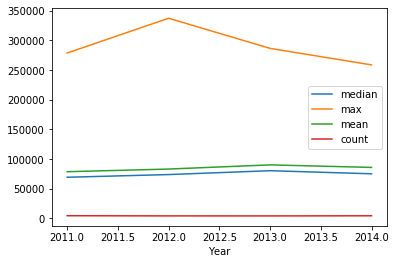

In [610]:
dr3.plot(); # график данных общей суммы TotalPay в виде линий

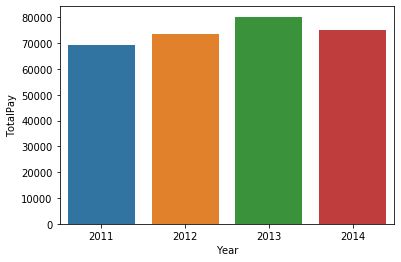

<Figure size 432x288 with 0 Axes>

In [611]:
# график данных общей суммы TotalPay - в виде диаграммы
MED = df_MEDICAL.groupby('Year').median()
MED.reset_index(inplace=True)
sns.barplot(x = 'Year', y='TotalPay' , data = MED)
plt.figure();

# ПОЛИЦИЯ

In [753]:
# группирую по ключевым словам относяшимся к департаменту - полиция
POLICE=['Sergeant','OFFICER','POLICE','Captain','Investigator','ATTORNEY','Criminalist','Examiner','Fingerprint','RESEARCH','Inspector','Fingerprint','Technician','Engineering','Assistant','Criminal','COMMISSIONER','ATTORNEY','Service','Witness']

df_POLICE = pd.DataFrame()
for i in POLICE:
    df_POLICE = df_POLICE.append(df[df['JobTitle'].str.upper().str.contains(i)])

In [754]:
df_POLICE.shape

(14814, 13)

In [755]:
#РАЗБИВКА  общей суммы по годам 
dr2=df_POLICE.groupby(['Year'])['TotalPay'].agg(['median','mean','max','count']) 
dr2

,median,mean,max,count
Year,,,,
2011,"123,465.9","121,853.2","538,909.3",4246
2012,"128,955.8","123,566.4","249,667.7",3530
2013,"136,122.4","128,153.8","262,317.8",3493
2014,"129,709.0","122,432.2","267,902.7",3545


In [175]:
df_POLICE = df_POLICE.drop(df_POLICE[df_POLICE.TotalPay.astype(float) >=538000.0].index)

In [677]:
df_POLICE.TotalPay.describe()

count    14,814.0
mean    123,885.6
std      35,653.6
min       2,084.6
25%     108,526.1
50%     129,421.0
75%     144,234.4
max     538,909.3
Name: TotalPay, dtype: float64

In [232]:
df_POLICE.groupby(['TotalPay'])['TotalPay'].count()

TotalPay
2,084.6      1
2,230.0      2
3,235.7      1
3,794.3      1
5,138.1      1
            ..
267,902.7    2
286,213.9    1
297,608.9    1
335,279.9    1
538,909.3    1
Name: TotalPay, Length: 8842, dtype: int64

# ПОЖАРНЫЕ

In [756]:
# группирую по ключевым словам относяшимся к департаменту - пожарные
FIRE=['FIRE']

df_FIRE = pd.DataFrame()
for i in FIRE:
    df_FIRE = df_FIRE.append(df[df['JobTitle'].str.upper().str.contains(i)])

In [719]:
df_FIRE.shape

(5345, 13)

In [757]:
#РАЗБИВКА общей суммы по годам
dr1=df_FIRE.groupby(['Year'])['TotalPay'].agg(['median','mean','max','count']) 
dr1

,median,mean,max,count
Year,,,,
2011,"147,765.0","149,351.3","326,373.2",1316
2012,"158,027.6","160,006.6","362,844.7",1325
2013,"165,918.4","167,185.8","347,102.3",1356
2014,"157,963.4","156,301.4","335,485.0",1348


In [138]:
df_FIRE.TotalPay.describe()

count     5,345.0
mean    158,270.0
std      44,743.1
min       7,870.4
25%     134,747.4
50%     157,263.7
75%     184,046.1
max     362,844.7
Name: TotalPay, dtype: float64

# проверим СКОЛЬКО СОТРУДНИКОВ В КАЖДОМ ДЕПАРТАМЕНТЕ
проверка на дубли, дубли удалю

In [680]:
#группировка по фио сотрудников в каждом департаменте, где дубликаты - False.
dk=df_FIRE.groupby(df_FIRE.EmployeeName.duplicated()==False).count()

#количество сотрудников относящихся к департаменту - пожарные
print('количество сотрудников относящихся к департаменту - пожарные',(dk.Id[1]+dk.Id[0]/2))
rr=(dk.Id[1]+dk.Id[0]/2)

dk=df_POLICE.groupby(df_POLICE.EmployeeName.duplicated()==False).count()

#количество сотрудников относящихся к департаменту - пожарные
print('количество сотрудников относящихся к департаменту - полиция',(dk.Id[1]+dk.Id[0]/2))
tt=(dk.Id[1]+dk.Id[0]/2)

dk=df_MEDICAL.groupby(df_MEDICAL.EmployeeName.duplicated()==False).count()

#количество сотрудников относящихся к департаменту - пожарные
print('количество сотрудников относящихся к департаменту - медицина',(dk.Id[1]+dk.Id[0]/2))
uu=(dk.Id[1]+dk.Id[0]/2)

количество сотрудников относящихся к департаменту - пожарные 4745.5
количество сотрудников относящихся к департаменту - полиция 10942.0
количество сотрудников относящихся к департаменту - медицина 12917.5


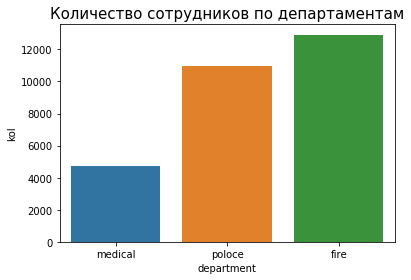

In [681]:
rtu=pd.DataFrame()
rtu = pd.DataFrame({'department': ['medical','poloce','fire'], 'kol': [rr,tt,uu]})
plt.title('Количество сотрудников по департаментам', fontsize=15)
sns.barplot(x = 'department', y='kol' , data = rtu)
#rtu.hist()

In [140]:
dk=df_POLICE.groupby(df_POLICE.EmployeeName.duplicated()==False).count()
dk

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
EmployeeName,,,,,,,,,,,,,
False,7744,7744,7744,7744,7744,7744,7744,7744,7744,7744,7744,7744,7744
True,7070,7070,7070,7070,7070,7070,7070,7070,7070,7070,7070,7070,7070


# сравним КАК ВЕДУТ СЕБЯ ЗНАЧЕНИЯ МЕЖДУ ДЕПАРТАМЕНТАМИ
медиана, средняя зарплата, максимальная

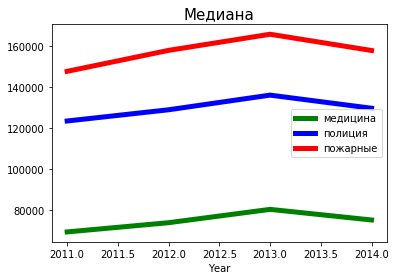

In [758]:
plt.title('Медиана', fontsize=15)
dr3['median'].plot(color='green',linewidth=5,label='медицина')
dr2['median'].plot(color='blue',linewidth=5, label='полиция')
dr1['median'].plot(color='red',linewidth=5, label='пожарные')
plt.legend(loc='best')
plt.show();


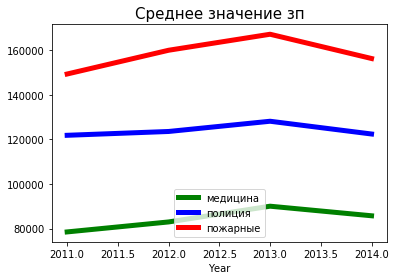

In [759]:
plt.title('Среднее значение зп', fontsize=15)
dr3['mean'].plot(color='green',linewidth=5, label='медицина')
dr2['mean'].plot(color='blue',linewidth=5, label='полиция')
dr1['mean'].plot(color='red',linewidth=5, label='пожарные')
plt.legend(loc='best')
plt.show();

In [ ]:
MED = df_MEDICAL.groupby('Year').median()
MED.reset_index(inplace=True)
sns.barplot(x = 'Year', y='TotalPay' , data = MED)
plt.figure();

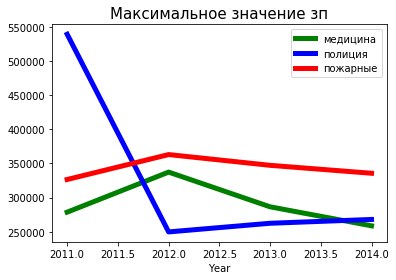

In [760]:
plt.title('Максимальное значение зп', fontsize=15)
dr3['max'].plot(color='green',linewidth=5,label='медицина')
dr2['max'].plot(color='blue',linewidth=5, label='полиция')
dr1['max'].plot(color='red',linewidth=5, label='пожарные')
plt.legend(loc='best')
plt.show();


При сравнении медианы, среднего и максимального значений зп у сотрудников департаментов - сотрудники депортамента пожарных самые стабильные самые большие
Несколько сотрудников полиции получили большие суммы, за счет них выросла максимальная зп сотрудников полиции, 
затем резко ушла вниз к 2012 года. Поэтому по графику максимальных сумм нельзя сказать ничего определенного.
По графикам медианы и среднего значения можно сказать, что за период с 2011 - 2014 зп за 2013 год была наибольшей.
Посмотрим дальше связано ли это с инфляцией





# ИНФЛЯЦИЯ
посмотрим как инфляция связана с зарплатой сотрудников 

Уровень инфляции в США в 2019 году составил 1,81%, что на 0,63% меньше, чем в 2018 году. 
Уровень инфляции в США в 2018 году составил 2,44%, что на 0,31% больше, чем в 2017 году.
Уровень инфляции в США в 2017 году составил 2,13%, что на 0,87% больше, чем в 2016 году.
Уровень инфляции в США в 2016 году составил 1,26%, что на 1,14% больше, чем в 2015 году. 
2014	1.62%	0.16%
2013	1.46%	-0.60%
2012	2.07%	-1.09%
2011	3.16%	1.52%
2015- 0.12

In [510]:
# нас интересует период с 2011- 2014, данные по инфляции за необходимые года внесла в DataFrame, год и коэффициет инфляции
inf=pd.DataFrame()
inf = pd.DataFrame({'YEAR': ['2011', '2012', '2013','2014'], 'Inflation Rate (%)': [3.16, 2.07, 1.46,1.62]})


In [480]:
inf

,YEAR,Inflation Rate (%)
0,2011,3.2
1,2012,2.1
2,2013,1.5
3,2014,1.6


In [761]:
# сгруппируем по базовой сумме  и построим графики с инфляцией 
df_FIRE.sort_values("BasePay") #сортирвка в порядке возрастания
df_POLICE.sort_values("BasePay") #сортирвка в порядке возрастания
df_MEDICAL.sort_values("BasePay") #сортирвка в порядке возрастания
dr1=df_FIRE.groupby(['Year'])['BasePay'].median() 
dr2=df_POLICE.groupby(['Year'])['BasePay'].median() 
dr3=df_MEDICAL.groupby(['Year'])['BasePay'].median() 
dr3


Year
2011   60,082.5
2012   63,995.0
2013   68,391.0
2014   66,676.3
Name: BasePay, dtype: float64

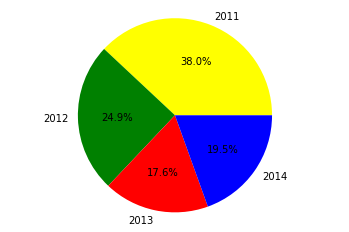

In [519]:
#или график инфляции изобразим в виде круговой диаграммы
colors = ['yellow','green','red','blue']
values = [3.16, 2.07, 1.46,1.62]
plt.pie(values,labels=inf.YEAR,colors=colors,autopct='%.1f%%')
plt.axis('equal')
plt.show()



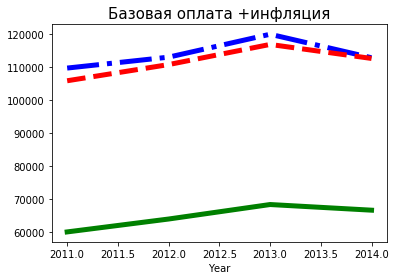

In [526]:
# рассмотрю на основной сумме (медиана)
plt.title('Базовая оплата +инфляция', fontsize=15)
dr3.plot(color='green',linewidth=5, label='медицина')
dr2.plot(color='blue',linewidth=5, label='полиция',linestyle='-.')
dr1.plot(color='red',linewidth=5, label='пожарные',linestyle='--')

plt.show()    


Из графиков видно - что коэффициент инфляции в 2013 году самый низкий, а зп -самые большие (см. график выше)
следовательно зп не понижали, а были увеличены. 


Можно сделать вывод -
на 2015 год коэффициент инфляции сильно уменьшился - на 1.50%, соответственно зп должны уменьшиться
НО!!! судя из предыдущего вывода, зп должны возрасти



Рассмотрели общую сумму заработной платы и можно сделать вывод- что зп пожарных и полиции больше чем медрабтников.
Общая сумма состоит базовой оплаты,сверхурочной работы, льгот.
Посмотрим как распределяются базовая оплата, сверхурочная работа и льготы между разными группами
'BasePay','OvertimePay','OtherPay' и на каком моменте медицина теряет в зп.
Псмтри с помщью диаграммы




In [254]:
df_FIRE['BasePay'].describe()

count      5345.000000
mean     113261.198614
std       26067.148122
min        6192.190000
25%      105934.660000
50%      112703.730000
75%      127456.920000
max      252423.600000
Name: BasePay, dtype: float64

In [67]:
# чтобы было лучше видно на графике, разделим на 1000
df_FIRE['BasePay1']=df_FIRE['BasePay']/1000
df_POLICE['BasePay1']=df_POLICE['BasePay']/1000
df_MEDICAL['BasePay1']=df_MEDICAL['BasePay']/1000

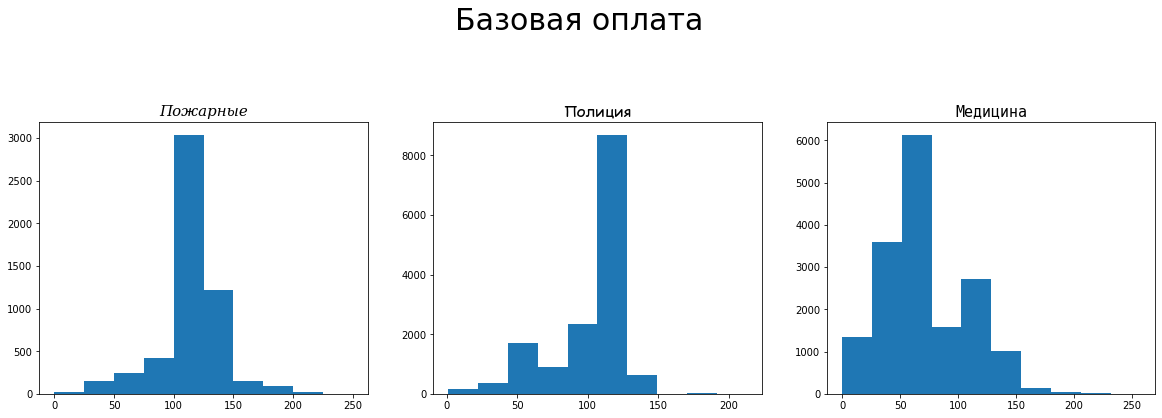

In [68]:
fig, axes =plt.subplots(1,3)

#  Заголовок области Figure:
fig.suptitle('Базовая оплата',
             y = 1.2,
             fontsize = 30)

axes[0].set_title('Пожарные',
                fontfamily = 'serif',
                fontstyle = 'italic',
                fontsize = 15)
axes[0].hist(df_FIRE['BasePay1'])

axes[1].set_title('Полиция',
                fontfamily = 'fantasy',
                fontstyle = 'oblique',
                fontsize = 15)
axes[1].hist(df_POLICE['BasePay1'])

axes[2].set_title('Медицина',
                fontfamily = 'monospace',
                fontstyle = 'normal',
                fontsize = 15)
axes[2].hist(df_MEDICAL['BasePay1'])



fig.set_figheight(5)
fig.set_figwidth(20)

plt.show()




базовая сумма пожарных и полиции находится в промежутке от 100000 до 150000, а медицина ориентировочно от 30000- 70000


In [69]:
# чтобы было лучше видно на графике, разделим на 1000
df_FIRE['OvertimePay1']=df_FIRE['OvertimePay']/1000
df_POLICE['OvertimePay1']=df_POLICE['OvertimePay']/1000
df_MEDICAL['OvertimePay1']=df_MEDICAL['OvertimePay']/1000

print(df_FIRE['OvertimePay1'])

4         9.7
6        89.1
8        86.4
10       71.3
14       74.1
         ... 
139153    0.4
141081    0.2
142509    0.8
142710    1.9
144801    0.7
Name: OvertimePay1, Length: 5345, dtype: float64


In [317]:
df_FIRE['OvertimePay1'].describe()

count    5849.000000
mean      110.395201
std        31.289141
min         0.073330
25%       105.934650
50%       112.190000
75%       127.124120
max       313.686010
Name: OvertimePay1, dtype: float64

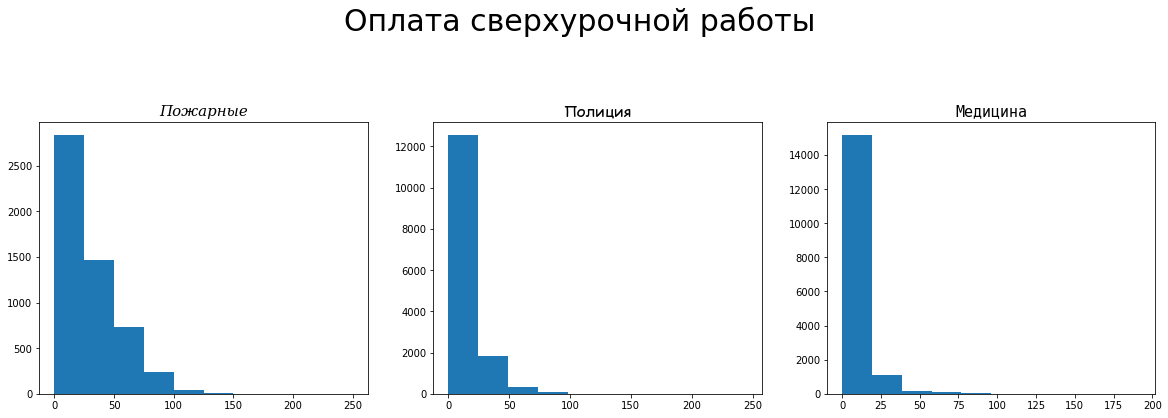

In [70]:
fig, axes =plt.subplots(1,3)


#  Заголовок области Figure:
fig.suptitle('Оплата сверхурочной работы',
             y = 1.2,
             fontsize = 30)

axes[0].set_title('Пожарные',
                fontfamily = 'serif',
                fontstyle = 'italic',
                fontsize = 15)
axes[0].hist(df_FIRE['OvertimePay1'],range=(0,250))

axes[1].set_title('Полиция',
                fontfamily = 'fantasy',
                fontstyle = 'oblique',
                fontsize = 15)
axes[1].hist(df_POLICE['OvertimePay1'])

axes[2].set_title('Медицина',
                fontfamily = 'monospace',
                fontstyle = 'normal',
                fontsize = 15)
axes[2].hist(df_MEDICAL['OvertimePay1'])



fig.set_figheight(5)
fig.set_figwidth(20)

plt.show()



оплата за сверхурочную работу у пожарных самая высокая, у сотрудникв полиции (некоторой категории) чуть больше чем у медиков



In [71]:
# чтобы было лучше видно на графике, разделим на 1000
df_FIRE['OtherPay1']=df_FIRE['OtherPay']/1000
df_POLICE['OtherPay1']=df_POLICE['OtherPay']/1000
df_MEDICAL['OtherPay1']=df_MEDICAL['OtherPay']/1000

In [72]:
df_FIRE['OtherPay'].median()  #describe()

16169.54

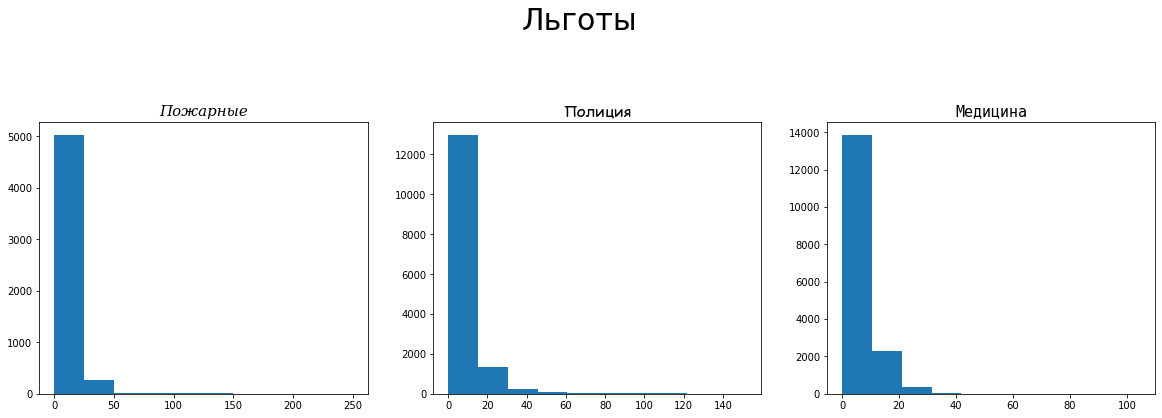

In [73]:
fig, axes =plt.subplots(1,3)

#  Заголовок области Figure:
fig.suptitle('Льготы',
             y = 1.2,
             fontsize = 30)

axes[0].set_title('Пожарные',
                fontfamily = 'serif',
                fontstyle = 'italic',
                fontsize = 15)
axes[0].hist(df_FIRE['OtherPay1'],range=(0,250))

axes[1].set_title('Полиция',
                fontfamily = 'fantasy',
                fontstyle = 'oblique',
                fontsize = 15)
axes[1].hist(df_POLICE['OtherPay1'])

axes[2].set_title('Медицина',
                fontfamily = 'monospace',
                fontstyle = 'normal',
                fontsize = 15)
axes[2].hist(df_MEDICAL['OtherPay1'])



fig.set_figheight(5)
fig.set_figwidth(20)

plt.show()





По льготам в зп опять преимущества у пожарных, далее полиция и медики - наименьшая
ИЗ всего можно сделать вывод, что медработники получают минимальную зп из данных категорий (основное отличие в базовой сумме), 
далее (намного больше) идут сотрудники полиции и чуть выше сотрудники пожарного департамента


# Посмотрим какое количество с разным уровнем дохода? (с помощью гистограммы с шагом в 5к) 
расмотрим на базовой сумме

In [774]:
import plotly.graph_objects as go

In [775]:
# разбиваем сумму на периоды и записываем ее в новую переменную (новый столбец)

df['BasePay1'] = (df['BasePay'] // 5000)  * 5000
#формируем через функцию
df['BasePay1'] = df['BasePay1'].map(lambda x: str(x) +' - '+ str((x + 5000)))

dfh = df.groupby('BasePay1').count()  # группировка по периодам
dfh = dfh.reset_index() #  суммы на периоды с шагом 5000 

# график 
fig = go.Figure(data = [go.Bar( name = 'Group A',x = dfh['BasePay1'].tolist(), y = dfh['BasePay'].tolist())])

fig.show()






На базе линейной регрессии посмотрим прогноз по должности CLINICAL NURSE SPECIALIST - медсестра департамента медицины



In [763]:
#выведу в DataFrame все данные по данной должности
df_NURSE = pd.DataFrame()
df_NURSE = df_NURSE.append(df[df['JobTitle'].str.upper().str.contains('CLINICAL NURSE SPECIALIST')])

In [764]:
# группирвка по базовой сумме по годам. Посмотрим как менялась зп за период с 2011 по 2014 года, использую величину -медиана

dd=df_NURSE.groupby(['Year'])['BasePay'].agg(['median','count']) 
dd

,median,count
Year,,
2011,"136,049.1",5
2012,"168,143.3",3
2013,"184,312.0",4
2014,"177,426.5",5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000005A9A0E08>,
      dtype=object)

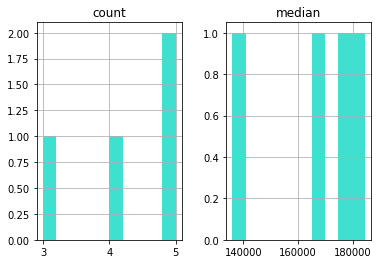

In [765]:
dd.hist(color='turquoise',linewidth=5)
#go.Figure(data = [go.Bar( name = 'Group A',x = dfh['BasePay1'].tolist(), y = dfh['BasePay'].tolist())])

In [767]:
df_NURSE.drop('Benefits', axis=1, inplace=True)
df_NURSE.drop('Notes', axis=1, inplace=True)
df_NURSE.drop('Status', axis=1, inplace=True)
df_NURSE.drop('Agency', axis=1, inplace=True)
#df_NURSE.drop('BasePay1', axis=1, inplace=True)

KeyError: "['Benefits'] not found in axis"

In [768]:
df_NURSE.drop('JobTitle', axis=1, inplace=True)
df_NURSE.drop('EmployeeName', axis=1, inplace=True)

In [769]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [770]:
df_NURSE


,Id,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
1175,1176,"164,372.0",948.3,250.0,"165,570.3","165,570.3",2011
1525,1526,"156,306.9",502.0,"3,859.6","160,668.5","160,668.5",2011
3402,3403,"136,049.1",500.3,250.0,"136,799.5","136,799.5",2011
4528,4529,"121,528.7","3,242.5","2,848.8","127,620.0","127,620.0",2011
28179,28180,"9,196.5",38.3,"19,170.1","28,405.0","28,405.0",2011
36680,36681,"178,968.0","2,113.2",250.0,"181,331.2","244,198.0",2012
36896,36897,"168,143.3","1,632.5","4,215.4","173,991.2","235,665.3",2012
42029,42030,"94,440.0","1,798.9","26,616.3","122,855.2","164,514.2",2012
73658,73659,"190,188.0","1,056.6",250.0,"191,494.6","246,596.4",2013
73668,73669,"190,188.0","1,056.6",487.8,"191,732.4","246,324.6",2013


In [771]:
# удалим общую сумму TotalPay , разобью базу на тестовую и учебную  на 25 и 75%
X_train, X_test, y_train, y_test = train_test_split(df_NURSE.drop('TotalPay',axis=1), df_NURSE['TotalPay'], test_size=0.25, random_state=42)

In [772]:
# линейная регрессия
reg = LinearRegression().fit(X_train, y_train)  # создаем модель
pred = reg.predict(X_test)   # предсказание

print(mean_squared_error(y_test, pred, squared=True))  # что было - True и что стало, находим среднеквадратичное 
# метод mean_squared_error

3.938703204732497e-21


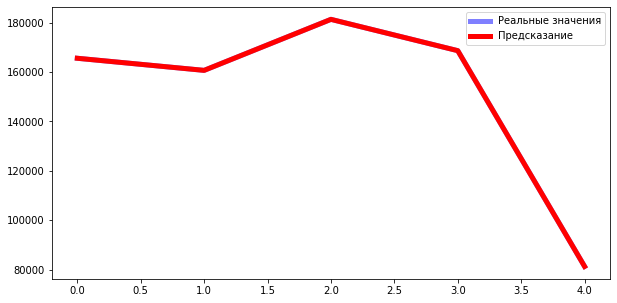

In [773]:
# посмотрим насколько идеальна модель -  совпадает
plt.figure(figsize=(10,5))
plt.plot(y_test.values, "blue",linewidth=5, label='Реальные значения', alpha=0.5)
plt.plot(pred, "red",linewidth=5, label='Предсказание')
plt.legend(loc='best')
plt.show()

в моем случае получается графики совпали - предположение - мало данных

# рассмотрим вариант когда взяты в работу значения - зп сотрудников за полный рабочий день
взята общая зп (с учетом сверхурочных часов и льгот)

In [656]:
pd.options.display.float_format = '{:,.1f}'.format #чтобы округлял значения до сотых:

In [662]:
# группирую по ключевым словам относяшимся к департаменту - медицина
MEDICAL=['PATIENT','PARAMEDIC','MEDICAL','NURSE','MENTAL','HEALTH','PHYSICIAN','PSYCHIATRIC','NURSING','HOSPITAL','PHYSICAL','THERAP','PHARMAC','PSYCHOLOGIST','X-RAY','NUTRITIONIST','DIETITIAN','ANESTHETIST','EPIDEMIOLOGIST','DENTAL','CLINICAL','REHABILITATION','HLTH','PATHOLOGIST','DISEASE','CARE','SURGICAL','DENTIST','MORGUE','REHABILITATION','PATIENT','MED STAFF','EPIDEMIOLOGIST']
df_MEDICAL = pd.DataFrame()
for i in MEDICAL:
    df_MEDICAL = df_MEDICAL.append(df[df['JobTitle'].str.upper().str.contains(i)&(df['Status']==1)])


# группируем TotalPay с разбивкой по годам
dr3=df_MEDICAL.groupby(['Year'])['TotalPay'].median()
k3=round(dr3.median(),2)


In [587]:
# группирую по ключевым словам относяшимся к департаменту - полиция
POLICE=['Sergeant','OFFICER','POLICE','Captain','Investigator','ATTORNEY','Criminalist','Examiner','Fingerprint','RESEARCH','Inspector','Fingerprint','Technician','Engineering','Assistant','Criminal','COMMISSIONER','ATTORNEY','Service','Witness']

df_POLICE = pd.DataFrame()
for i in POLICE:
    df_POLICE = df_POLICE.append(df[df['JobTitle'].str.upper().str.contains(i)&(df['Status']==1)])

    #РАЗБИВКА  общей суммы по годам 
dr2=df_POLICE.groupby(['Year'])['TotalPay'].median()
k2=dr2.median()


In [591]:
# группирую по ключевым словам относяшимся к департаменту - пожарные
FIRE=['FIRE']

df_FIRE = pd.DataFrame()
for i in FIRE:
    df_FIRE = df_FIRE.append(df[df['JobTitle'].str.upper().str.contains(i)&(df['Status']==1)])
    #РАЗБИВКА общей суммы по годам
dr1=df_FIRE.groupby(['Year'])['TotalPay'].median() 
k1=dr1.median()
k1

160607.83

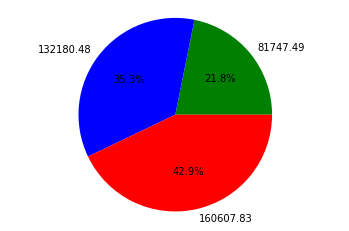

In [664]:
#или график инфляции изобразим в виде круговой диаграммы
color = ['green','blue','red']
values = [k3,k2,k1]
labels=[k3,k2,k1]
plt.pie(values,labels=labels,colors=color,autopct='%.1f%%')
plt.axis('equal')
plt.show()


вывод - в любом случае - зп сотрудников пожарных самая большая